In [64]:
import pandas as pd
import numpy as np

In [65]:
data=pd.read_csv('Suicides in India 2001-2012.csv')

In [66]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [67]:
#this function list unique values in a column
def unique_values(dataset,columnName):
    pointlist=dataset[columnName].values
    points=[]
    for i in range(len(pointlist)):
        if pointlist[i] not in points:
            points.append(pointlist[i])
    return points

In [71]:
#total states
states=unique_values(data,'State')

In [100]:
states[:5]

['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar']

In [73]:
#State analysis

In [74]:
data.set_index('State',inplace=True)

In [101]:
state_data=data.filter(like=states[4],axis=0)

In [154]:
#for whole country analysis set 
state_data=data

In [155]:
#Listing problems(Type)

In [156]:
problems=unique_values(state_data,'Type')

In [157]:
len(problems)

69

In [158]:
problems[:5]

['Illness (Aids/STD)',
 'Bankruptcy or Sudden change in Economic',
 'Cancellation/Non-Settlement of Marriage',
 'Physical Abuse (Rape/Incest Etc.)',
 'Dowry Dispute']

In [159]:
#listing Type_Code

In [160]:
type_codes=unique_values(up_data,'Type_code')

In [161]:
type_codes

['Causes',
 'Education_Status',
 'Means_adopted',
 'Professional_Profile',
 'Social_Status']

In [162]:
#Taking State(Country if set) data stated by Causes

In [163]:
state_data_by_cause=state_data[state_data['Type_code']=='Causes']

In [164]:
prob_in_state_data_by_cause=unique_values(state_data_by_cause,'Type')

In [165]:
prob_in_state_data_by_cause

['Illness (Aids/STD)',
 'Bankruptcy or Sudden change in Economic',
 'Cancellation/Non-Settlement of Marriage',
 'Physical Abuse (Rape/Incest Etc.)',
 'Dowry Dispute',
 'Family Problems',
 'Ideological Causes/Hero Worshipping',
 'Other Prolonged Illness',
 'Property Dispute',
 'Fall in Social Reputation',
 'Illegitimate Pregnancy',
 'Failure in Examination',
 'Insanity/Mental Illness',
 'Love Affairs',
 'Professional/Career Problem',
 'Divorce',
 'Drug Abuse/Addiction',
 'Not having Children(Barrenness/Impotency',
 'Causes Not known',
 'Unemployment',
 'Other Causes (Please Specity)',
 'Poverty',
 'Death of Dear Person',
 'Cancer',
 'Suspected/Illicit Relation',
 'Paralysis',
 'Bankruptcy or Sudden change in Economic Status',
 'Not having Children (Barrenness/Impotency']

In [166]:
data_array=np.array([])

In [167]:
pistdbc=prob_in_state_data_by_cause
for i in range(len(pistdbc)):
    total=state_data_by_cause[state_data_by_cause['Type']==pistdbc[i]]['Total'].values.sum()
    data_array=np.append(data_array,[total],axis=0)

In [168]:
#These are number of sucides acc to reasons
data_array[:5]

array([ 8723., 32755., 11296.,  3992., 31970.])

In [169]:
prob_in_state_data_by_cause=np.array(prob_in_state_data_by_cause)

In [170]:
data_tp=pd.DataFrame(data_array)

In [171]:
data_tp['Reasons']=prob_in_state_data_by_cause

In [172]:
data_tp.set_index('Reasons',inplace=True)

In [173]:
data_tp=data_tp.rename(columns={0:'total no of sucides'})

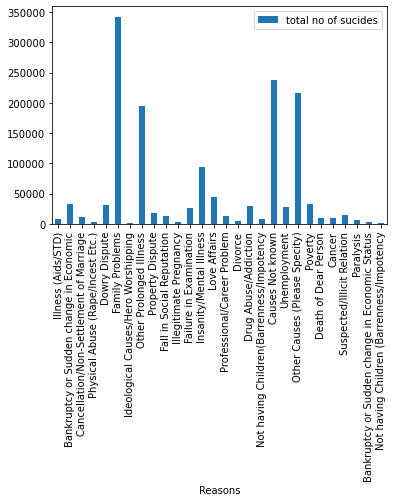

In [174]:
data_tp.plot(kind='bar')

In [175]:
# for more clear view of chart , we are removing sucides whose reason are not knows

In [200]:
indextorem=[]
probs_to_rem=['Causes Not known','Other Causes (Please Specity)']
for i in range(len(probs_to_rem)):
    indextorem.append(np.where(prob_in_state_data_by_cause==[probs_to_rem[i]])[0][0])
indextorem

[18, 20]

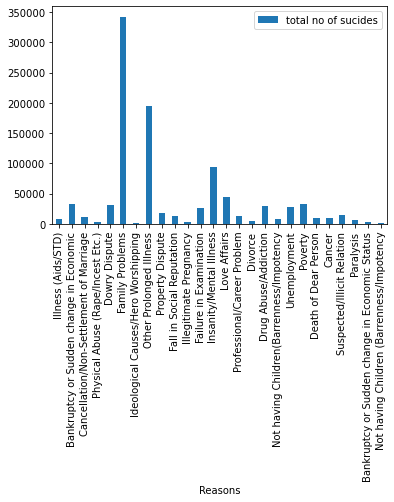

In [203]:
data_tp[data_tp.index.isin(np.delete(prob_in_state_data_by_cause,indextorem,0))].plot(kind='bar')